In [5]:
import numpy as np # Import numpy for calculations
import matplotlib.pyplot as plt # Import matplotlib for plotting

In [10]:
def random():
    """
    This function will generate a random dataset for us
    and it will return x1 and x2 (both are features) and
    the corresponding y label.
    In the end we will have 20 features which are labeled
    with 0 and 30 features which are labeled with 1.
    """
    X1 = []
    X2 = []
    y = []

    np.random.seed(1)
    # Generate 20 features with label 0
    for i in range(0, 20):
        X1.append(i)
        X2.append(np.random.randint(100))
        y.append(0)

    # Generate 30 features with label 1
    for i in range(20, 50):
        X1.append(i)
        X2.append(np.random.randint(80, 300))
        y.append(1)

    return X1, X2, y

In [11]:
def standardize(data):
    """
    This function will standardize our data
    to get a smaller range between our values.
    """
    data -= np.mean(data)
    data /= np.std(data)
    return data

In [12]:
def plot(X):
    """
    X[:, 0] = take all rows but just for the 0th column
    X[:, 1] = take all rows but just for the 1th column

    example: X = [[3, 5],
                [4, 6]]
    output for X[:, 0] = [3, 4]
    """
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

In [13]:
def sigmoid(X, theta):
    z = np.dot(X, theta.T) # Is the same as w0+w1*x0+...
    return 1.0/(1 + np.exp(-z)) # Applying our sigmoid function

![alt text](https://miro.medium.com/max/1454/1*dEZxrHeNGlhfNt-JyRLpig.png)

In [14]:
def loss_function(h, y):
    # This is just the formula above
    # h_{theta} will be here our modified sigmoid function
    # and y will be our correct given labels
    loss = ((-y * np.log(h)) - ((1 - y) * np.log(1 - h))).mean()
    return loss

In [15]:
def gradient_descent(X, h, y):
    # This is the derivative of our loss function with respect
    # to our parameters 
    return np.dot(X.T, (h - y))/y.shape[0]

In [16]:
def update_loss(theta, learning_rate, gradient):
    return theta - (learning_rate * gradient) # Updating the loss as usally

In [18]:
def predict(X, theta):
    threshold = 0.5 # This is our decision boundary
    outcome = [] # Saving our outcome
    # Calculating the result by giving the input data
    # to the modified sigmoid function
    result = sigmoid(X, theta)
    for i in range(X.shape[0]):
        # Checks the decision boundary
        if result[i] <= threshold:
            outcome.append(0)
        else:
            outcome.append(1)
    return outcome

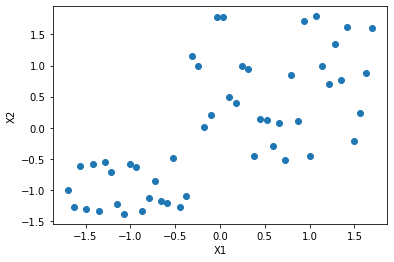

In [19]:
X1, X2, y = random() # Generate random dataset

# Standardize the data to get a normal range
X1 = standardize(X1)
X2 = standardize(X2)

X = np.array(list(zip(X1, X2)))
y = np.array(y)

plot(X)

In [20]:
# Feature length
m = X.shape[0]

# Number of features
n = X.shape

# Number of labels
k = len(np.unique(y))

# Add a 1 to all our rows in the dataset
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# Initialize weights
theta = np.zeros(X.shape[1])

epochs = 1000

for i in range(epochs):
    # Calculate the predicted values
    h = sigmoid(X, theta)
    # Calculate the gradient
    gradient = gradient_descent(X, h, y)
    # Update our weights
    theta = update_loss(theta, 0.1, gradient)

    if i % 100 == 0:
        print('epoch:', i, 'loss:', loss_function(h, y))

outcome = predict(X, theta)
print("theta_0: {} , theta_1: {}, theta_2: {}".format(theta[0], theta[1], theta[2]))

epoch: 0 loss: 0.6931471805599453
epoch: 100 loss: 0.13835182625279083
epoch: 200 loss: 0.08802405442319312
epoch: 300 loss: 0.06692317467281499
epoch: 400 loss: 0.054933327462045684
epoch: 500 loss: 0.04707805228696062
epoch: 600 loss: 0.04147940377250779
epoch: 700 loss: 0.03725922897801588
epoch: 800 loss: 0.03394813009481125
epoch: 900 loss: 0.031270892309706616
theta_0: 1.731104110180229 , theta_1: 3.384426535937368, theta_2: 2.841095441821299


In [21]:
def predict_numbers(x, theta):
    result = sigmoid(x, theta)
    return result

In [22]:
x = np.array([0, 1, 1]) # [intercept, x1 feature value, x2 feature value]
# Predict our input data with our calculated theta parameters
predict_numbers(x, np.array([theta[0], theta[1], theta[2]]))

0.9980256149860082